Episode 0


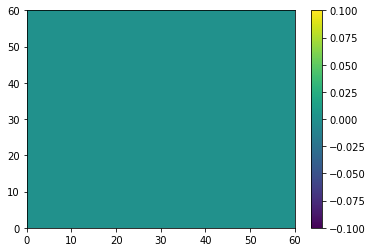

Episode 10


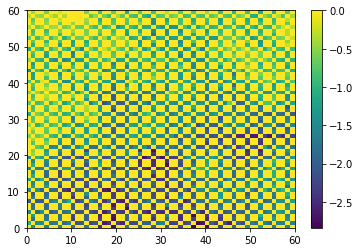

Episode 20


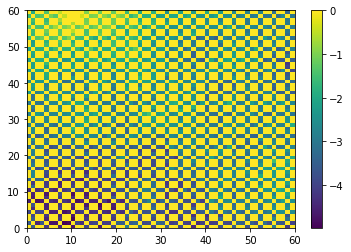

Episode 30


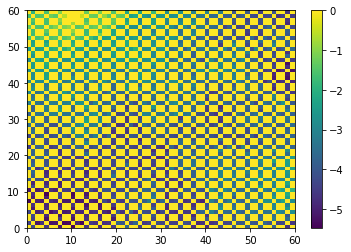

Episode 40


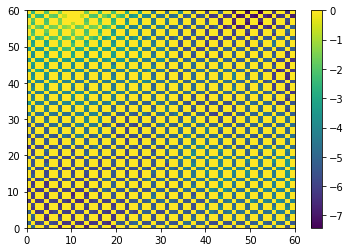

Episode 50


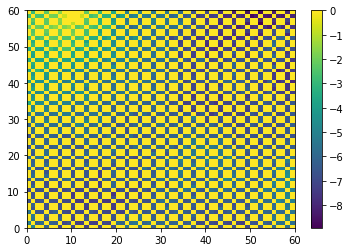

Episode 60


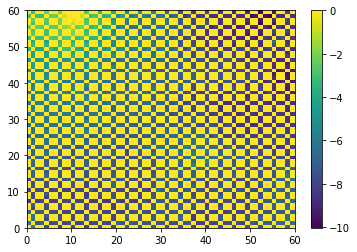

Episode 70


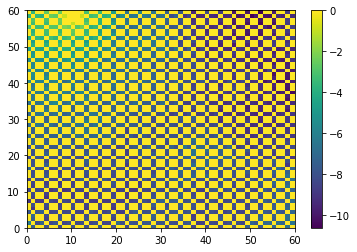

Episode 80


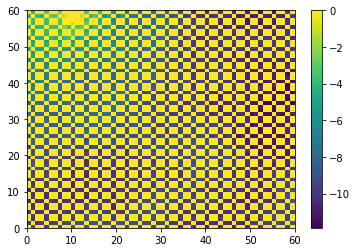

Episode 90


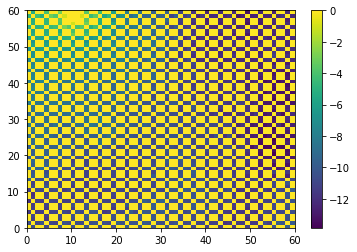

Episode 100


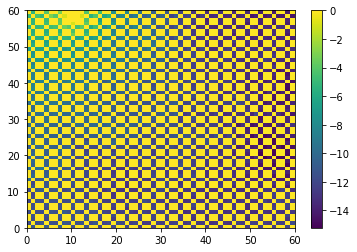

In [3]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import SARSA
from myelin.core import RLInteraction, MDPEnvironment
from myelin.mdps import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS, COLS = 20, 20
CELL_SIZE = 3

mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)


class GridWorldQFunction:
    def __init__(self):
        self._table = np.zeros((ROWS * CELL_SIZE, COLS * CELL_SIZE))

    def __setitem__(self, key, value):
        state, action = key
        key_ = tuple((np.array(state) * CELL_SIZE) + 1 + np.array(action))
        self._table[key_] = value

    def __getitem__(self, key):
        state, action = key
        key_ = tuple((np.array(state) * CELL_SIZE) + 1 + np.array(action))
        return self._table[key_]


qf = GridWorldQFunction()
agent = SARSA(policy, qf)


###########
# Display #
###########


def display(qf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(qf._table)
    plt.colorbar()
    plt.show()

##########################
# Termination conditions #
##########################


def max_episodes(info):
    return info['episode'] == 100


#############
# Callbacks #
#############


class Monitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 10 == 0:
            print('Episode {}'.format(episode))
            display(qf)

    def on_train_end(self, episode):
        print('Episode {}'.format(episode))
        display(qf)


#################################
# Agent-Environment Interaction #
#################################


rl_interaction = RLInteraction(
    env=env,
    agent=agent,
    callbacks=[Monitor()],
    termination_conditions=[max_episodes]
)

rl_interaction.train()
